In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Circle

from liggghts_file_parsing import get_dt, create_bond_df, create_atom_df

%config InlineBackend.figure_format = 'retina'

# streamlined visualization

In [25]:
directory = r"\\wsl$\Ubuntu-18.04\home\arlenlex\LIGGGHTS_SEAICE\lexi_tests\floe_testing\post"
log_file_path = r"\\wsl$\Ubuntu-18.04\home\arlenlex\LIGGGHTS_SEAICE\lexi_tests\floe_testing\log.liggghts"

In [26]:
dt = get_dt(log_file_path)
df_bond = create_bond_df(directory)
df_atom = create_atom_df(directory)

# plot

In [4]:
def plot_relevant_quantities(df_atom, df_bond, dt, simulation_num, len = -1):
    #TODO: make this code more conducive to plotting from my dataframes
    fig, axes = plt.subplots(4,1, layout = 'constrained', sharex=True, figsize = (8,10))
    ax = axes.flatten()

    fig.suptitle(f'simulation: {simulation_num}')

    # plt.sca(ax[0])
    # id = 1
    # plt.plot(df_atom.index.values * dt, df_atom[id]['atom_fmag'], 'o-', color = 'r', lw = 0.5, markersize = 1, label = f'id = {id}')
    # id = 2
    # plt.plot(df_atom.index.values * dt, df_atom[id]['atom_fmag'], 'o-', color = 'b', lw = 0.5, markersize = 1, label = f'id = {id}')
    # plt.ylabel(r'$|F_a|$ [N]')
    # plt.grid(True)
    # plt.legend()

    plt.sca(ax[0])
    plt.plot(df_bond.index.values * dt, np.abs(df_bond['b_fmag'].values), 'o-', color = 'k', lw = 0.5, markersize = 1)
    plt.plot(df_bond.index.values * dt, np.abs(df_bond['bstatus'].values)*3e8, 'o-', color = 'indigo', lw = 0.5, markersize = 1)
    plt.ylabel(r'$|F_b|$ [N]')
    plt.grid(True)


    plt.sca(ax[1])
    id = 1
    plt.plot(df_atom.index.values * dt, np.abs(df_atom[id]['x'].values - df_atom[id]['x'].values[0]), 'o-', color = 'r', lw = 0.5, markersize = 1, label = f'id = {id}')
    id = 2
    plt.plot(df_atom.index.values * dt, np.abs(df_atom[id]['x'].values - df_atom[id]['x'].values[0]), 'o-', color = 'b', lw = 0.5, markersize = 1, label = f'id = {id}')
    plt.ylabel(r'$\Delta x$ [m]')
    plt.grid(True)
    plt.legend()

    plt.sca(ax[2])
    id = 1
    plt.plot(df_atom.index.values * dt, (df_atom[id]['vx'].values), 'o-', color = 'r', lw = 0.5, markersize = 1, label = f'id = {id}')
    id = 2
    plt.plot(df_atom.index.values * dt, (df_atom[id]['vx'].values) , 'o-', color = 'b', lw = 0.5, markersize = 1, label = f'id = {id}')
    plt.ylabel(r'$v_x$ [m/s]')
    plt.grid(True)
    plt.legend()

    plt.sca(ax[3])
    id = 1
    plt.plot(df_atom.index.values * dt, df_atom[id]['fx'], 'o-', color = 'r', lw = 0.5, markersize = 1, label = f'id = {id}')
    id = 2
    plt.plot(df_atom.index.values * dt, df_atom[id]['fx'], 'o-', color = 'b', lw = 0.5, markersize = 1, label = f'id = {id}')
    plt.ylabel(r'$F_x$ [N]')
    plt.grid(True)
    plt.legend()
    plt.xlabel('time [s]')

    # plt.sca(ax[4])
    # id = 1
    # plt.plot(df_atom.index.values * dt, df_atom[id]['fy'], 'o-', color = 'r', lw = 0.5, markersize = 1, label = f'id = {id}')
    # id = 2
    # plt.plot(df_atom.index.values * dt, df_atom[id]['fy'], 'o-', color = 'b', lw = 0.5, markersize = 1, label = f'id = {id}')
    # plt.ylabel(r'$F_y$ [N]')
    # plt.grid(True)

    # plt.legend()

    # plt.sca(ax[4])
    # plt.plot(df_bond.index.values * dt, df_bond['bfx'], 'o-', color = 'k', lw = 0.5, markersize = 1)
    # plt.ylabel(r'$F_x^b$ [N]')
    # plt.xlabel('time [s]')
    # plt.grid(True)

    plt.close()

    return fig

In [24]:
print(f'atom mass: {df_atom[1]['mass'].values[1]}')
m1 = df_atom[6]['mass'].values[1]
rho = 910
vol2 = np.pi*5**2
vol3 = np.pi * 5**3 * 4/3
m2 = rho * vol2
print(f'true mass = {rho * vol2}')

atom mass: 71471.2
true mass = 71471.2328691678


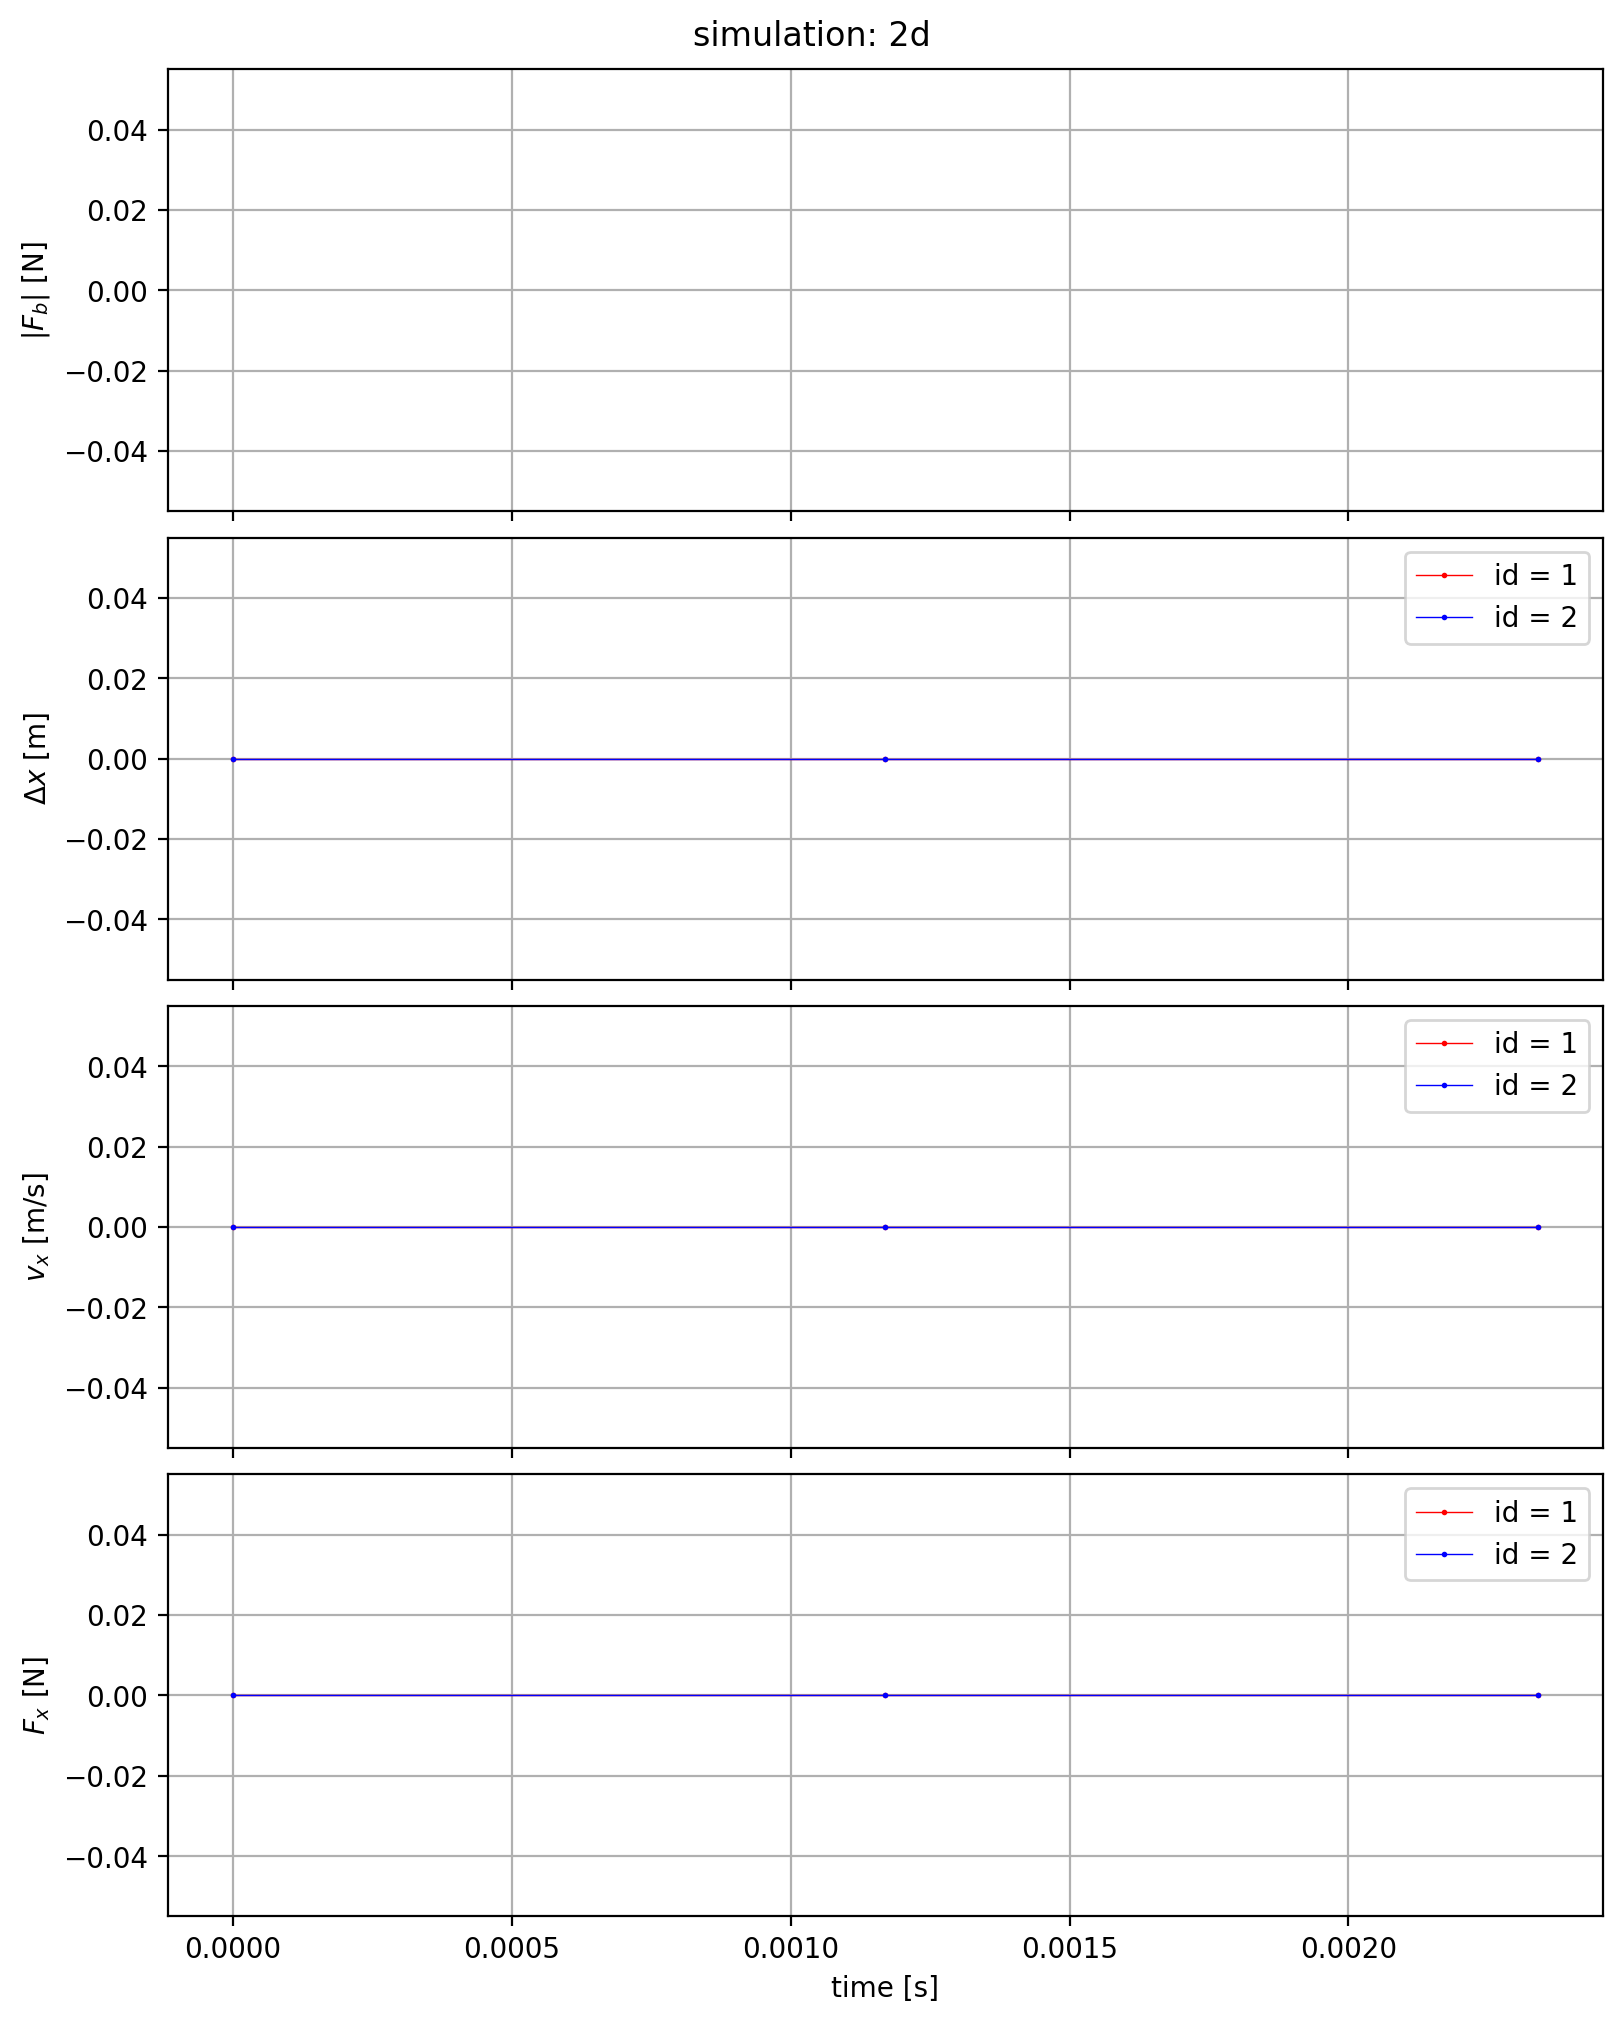

In [6]:
plot_relevant_quantities(df_atom, df_bond, dt, r'2d')

# save gif of simulation

### bonds

MovieWriter Pillow unavailable; using Pillow instead.


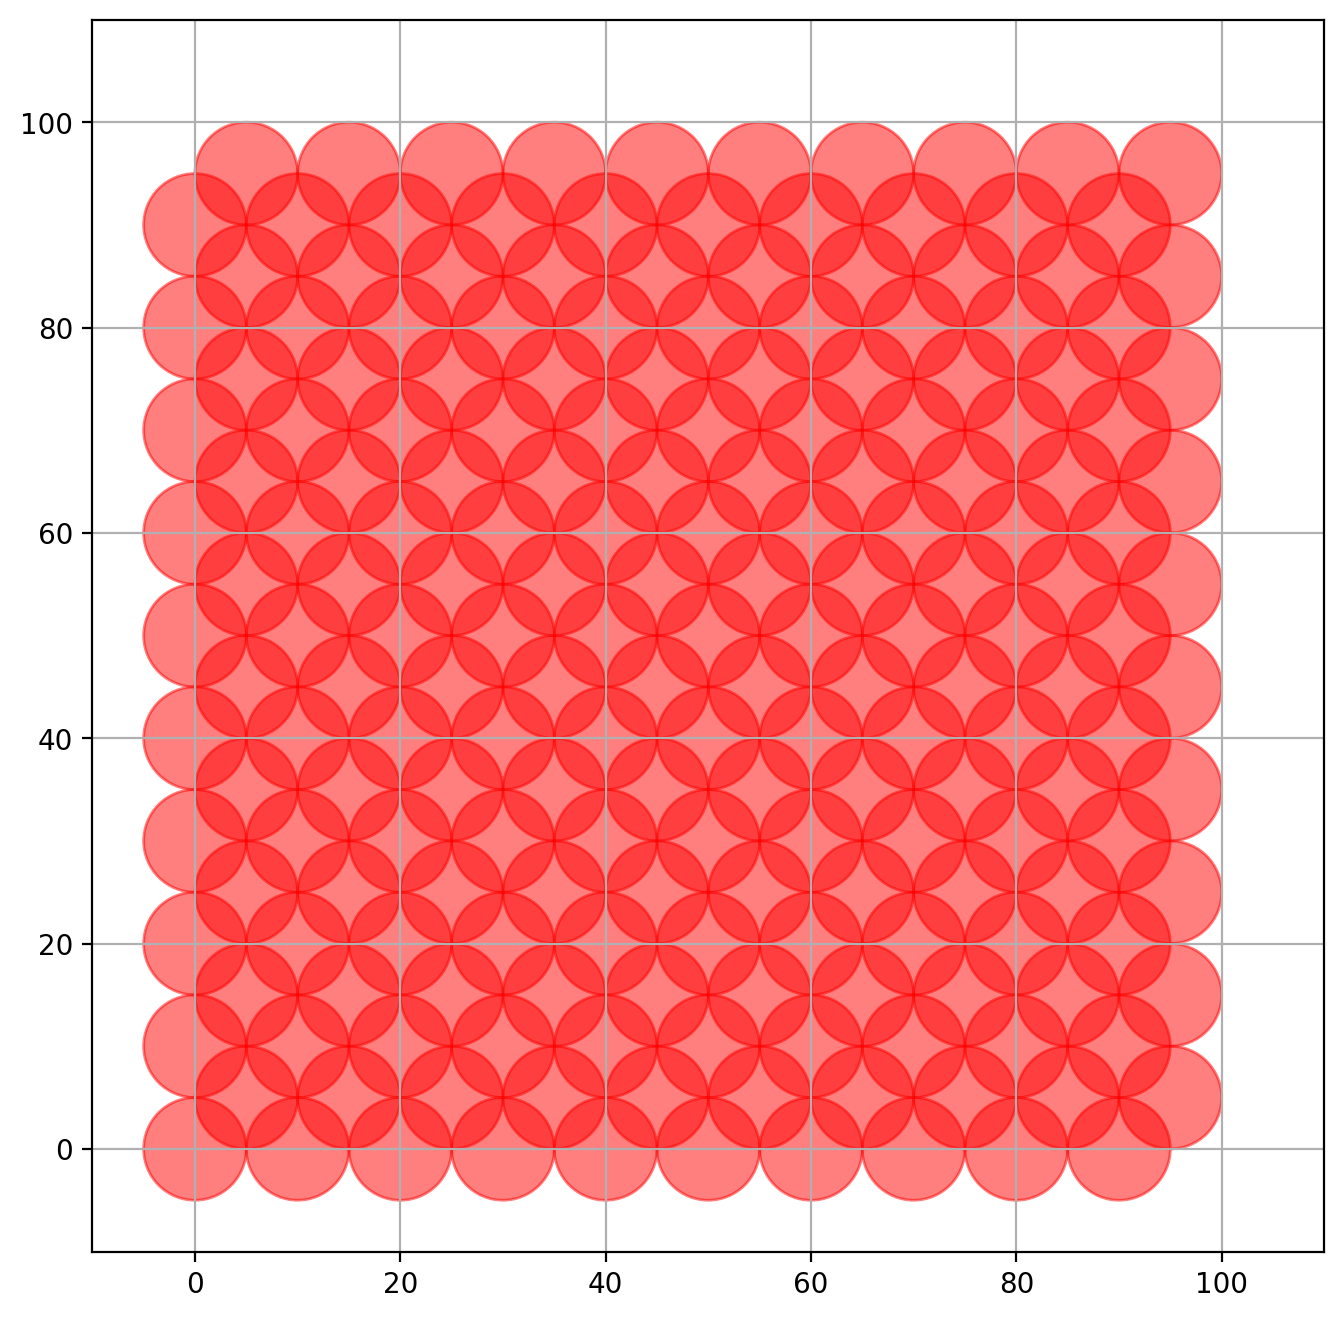

In [27]:
fig, ax = plt.subplots(figsize=(8, 8))

# Use bond values to determine whether bond exists or not
bond_dne = df_bond['bstatus'].values

# Dictionary to store circle objects for each atom
circles = {}

# Assuming df_atom has already been defined and structured correctly
unique_atoms = set(idx[0] for idx in df_atom.keys())

# Initialize circles at their initial positions
for atom_id in unique_atoms:
    initial_x = df_atom[(atom_id, 'x')].iloc[0]
    initial_y = df_atom[(atom_id, 'y')].iloc[0]
    radius = df_atom[(atom_id, 'radius')].iloc[0]
    circle = Circle((initial_x, initial_y), radius, color='blue', alpha=0.5)
    ax.add_patch(circle)
    circles[atom_id] = circle

# Set the plot limits manually
ax.set_xlim(-10, 110)
ax.set_ylim(-10, 110)
ax.set_aspect('equal', 'box')
ax.grid()

# Update function for animation
def update(frame):
    for atom_id in unique_atoms:
        new_x = df_atom[(atom_id, 'x')].iloc[frame]
        new_y = df_atom[(atom_id, 'y')].iloc[frame]
        bond_broken = bond_dne[frame]  # Assuming atom_id starts from 1 and maps directly to indices (0-based)
        color = 'red' if ((bond_broken==1) or (np.isnan(bond_broken))) else 'blue'  # Change color if bond status is NaN
        circles[atom_id].center = (new_x, new_y)
        circles[atom_id].set_color(color)  # Update the color based on bond status
    return circles.values()

# Animation parameters
N = 2
frame_indices = range(0, len(df_atom[(next(iter(unique_atoms)), 'x')]), N)

# Create and save the animation
anim = FuncAnimation(fig, update, frames=frame_indices, blit=True, repeat=True)
anim.save('gifs/bond_tests/tension/coeffrest=0.2.png', writer='Pillow', fps=10)  # Adjust fps as needed

plt.show()
